In [1]:
"""PLOT CARTESIAN ELLIPSE BY DIRECT PLOT"""
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches



In [2]:
#Abscisse
x = np.linspace(-10,10,200000)


In [3]:
#general - ellipse centered on x0,y0 with main axis a and small axis b, angle of rotation alpha

def general_ellipse(x0,y0,a,b,alpha):
    A = (b**2)*(np.sin(alpha)**2)+(a**2)*(np.cos(alpha)**2)
    B = 2*(x-x0)*np.cos(alpha)*np.sin(alpha)*((b**2)-(a**2))
    C = ((x-x0)**2)*((b**2)*(np.cos(alpha)**2)+(a**2)*(np.sin(alpha)**2))-(a**2)*(b**2)
    y = (y0 + (-B+np.sqrt(B**2-4*A*C))/(2*A))
    z = (y0 + (-B-np.sqrt(B**2-4*A*C))/(2*A))
    return y,z

In [4]:
def artery_wall_in(a_wall_in,b_wall_in):
    return general_ellipse(0,0,a_wall_in,b_wall_in,0)

def artery_wall_out(a_wall_out,b_wall_out):
    return general_ellipse(0,0,a_wall_out,b_wall_out,0)

def lumen(x_L,a_L,b_L):
    return general_ellipse(x_L,0,a_L,b_L,0)

def calcium(x_cal,y_cal,a_cal,b_cal,alpha_cal):
    return general_ellipse(x_cal,y_cal,a_cal,b_cal,alpha_cal)

def lipid(x_lip,y_lip,a_lip,b_lip,alpha_lip):
    return general_ellipse(x_lip,y_lip,a_lip,b_lip,alpha_lip)

In [5]:
def cross_two_graphs(y,z):
    """check if two graphs cross each other"""
    idx = np.intersect1d(np.argwhere(np.isnan(y)==False),np.argwhere(np.isnan(z)==False)) #abscisses where both graph are simultaneously determined 
    if np.argwhere(np.diff(np.sign(y[idx]-z[idx])) != 0).size>0 :
        return True
    else: 
        return False

def check_intersection_two_ellipses(y1,z1,y2,z2):
    """check if two ellispses (4 graphs) cross each other"""
    if cross_two_graphs(y1,y2):
        return True
    elif cross_two_graphs(y1,z2):
        return True
    elif cross_two_graphs(z1,y2):
        return True
    elif cross_two_graphs(z1,z2):
        return True
    
def check_intersection_all_ellipses(y_wall_in,z_wall_in,y_lumen,z_lumen,y_lipid,z_lipid,y_calcium,z_calcium):
    """check if any pair of ellispses (6 ellipses) cross each other"""
    if check_intersection_two_ellipses(y_wall_in,z_wall_in,y_lumen,z_lumen):
        return True
    elif check_intersection_two_ellipses(y_wall_in,z_wall_in,y_lipid,z_lipid):
        return True
    elif check_intersection_two_ellipses(y_wall_in,z_wall_in,y_calcium,z_calcium):
        return True
    elif check_intersection_two_ellipses(y_lumen,z_lumen,y_lipid,z_lipid):
        return True 
    elif check_intersection_two_ellipses(y_lumen,z_lumen,y_calcium,z_calcium):
        return True 
    elif check_intersection_two_ellipses(y_calcium,z_calcium,y_lipid,z_lipid):
        return True

In [6]:
def artery_plot(a_wall_in, b_wall_in, thick_wall, x_L, a_L, b_L, x_cal, y_cal, a_cal, b_cal, alpha_cal, x_lip, y_lip, a_lip, b_lip, alpha_lip):

    plt.gcf().clear() #flush the previous plot if still loaded

    y_wall_in,z_wall_in=artery_wall_in(a_wall_in,b_wall_in)

    y_wall_out,z_wall_out = artery_wall_out(a_wall_in*thick_wall, b_wall_in*thick_wall)
    plt.plot(x,y_wall_in,'b-')
    plt.plot(x,z_wall_in,'b-')
    plt.plot(x,y_wall_out,'b-')
    plt.plot(x,z_wall_out,'b-')

    y_lumen,z_lumen = lumen(x_L,a_L,b_L)
    plt.plot(x,y_lumen,'r-')
    plt.plot(x,z_lumen,'r-')

    y_calcium,z_calcium = calcium(x_cal,y_cal,a_cal,b_cal,alpha_cal)
    plt.plot(x,y_calcium,'y-')
    plt.plot(x,z_calcium,'y-')

    y_lipid,z_lipid = lipid(x_lip,y_lip,a_lip,b_lip,alpha_lip)
    plt.plot(x,y_lipid,'g-')
    plt.plot(x,z_lipid,'g-')
    
    if check_intersection_all_ellipses(y_wall_in,z_wall_in,y_lumen,z_lumen,y_lipid,z_lipid,y_calcium,z_calcium):
        #if any pair of ellipses cross each other, don't plot
        print("**ELLIPSES CROSSING**")
        return 1

    plot_limit = a_wall_in*thick_wall*1.1
    plt.xlim([-plot_limit,plot_limit])
    plt.ylim([-plot_limit,plot_limit])
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

In [9]:
#parameters

#Artery wall - Blue
a_wall_in= 5
b_wall_in= 3
thick_wall = 1.1

#Lumen - Red
x_L= -3
a_L = 2.2
b_L = 2.5

#Lipid mass - Green
x_lip = 2.3
y_lip = -1
a_lip = 0.5
b_lip = 0.4
alpha_lip = np.pi/3 #angle in rad

#Calcium mass - Yellow
x_cal = 2
y_cal = 1.2
a_cal = 0.2
b_cal = 0.6
alpha_cal = np.pi/4 #angle in rad

/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:7: RuntimeWarning: invalid value encountered in sqrt
/Users/Jonas/virtualenvs/RythmChallenge/lib/python3.4/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in sqrt


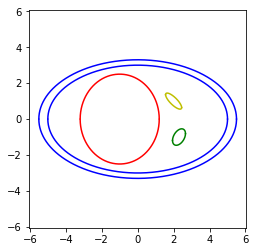

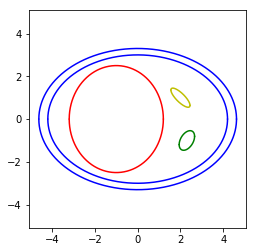

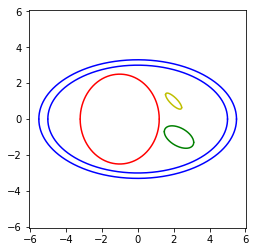

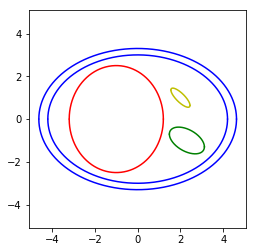

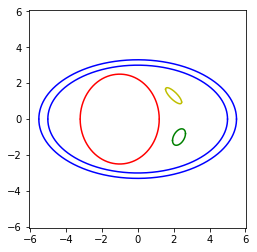

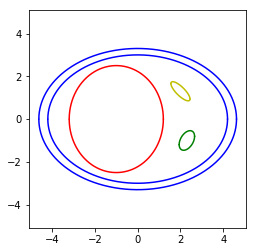

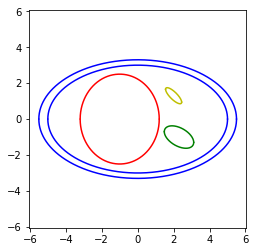

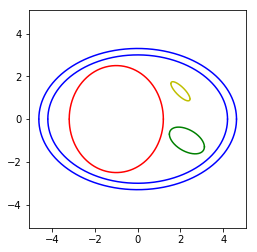

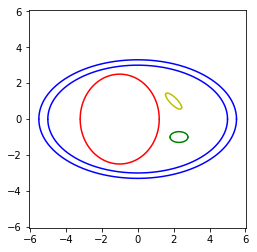

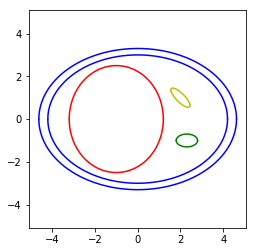

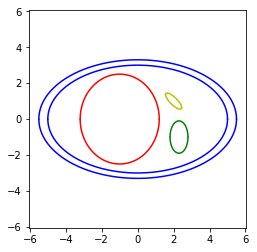

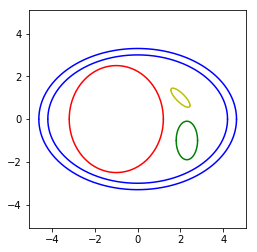

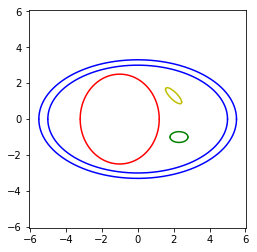

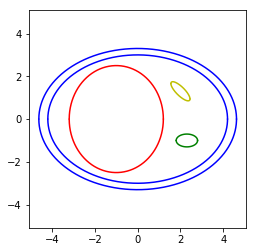

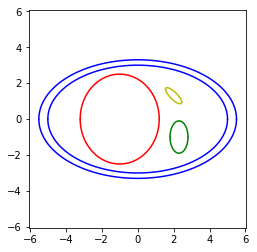

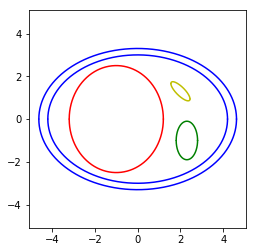

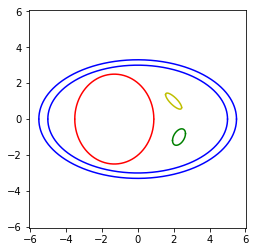

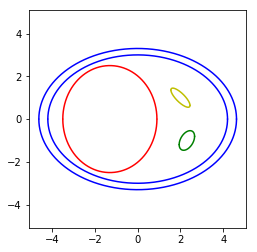

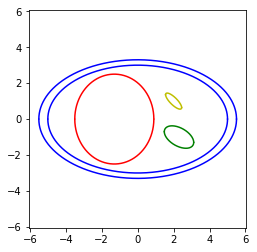

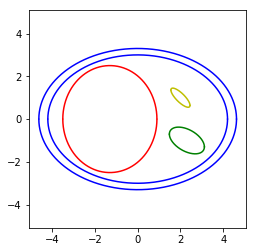

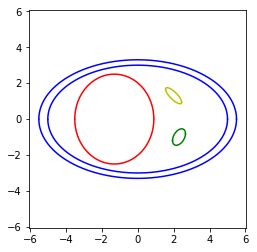

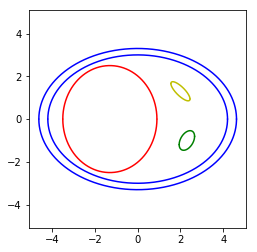

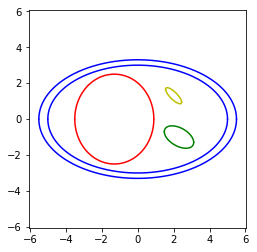

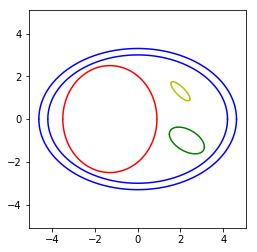

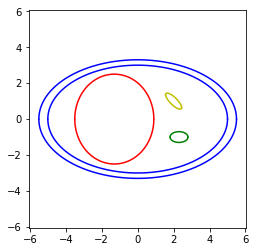

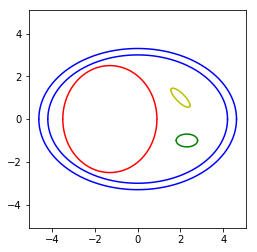

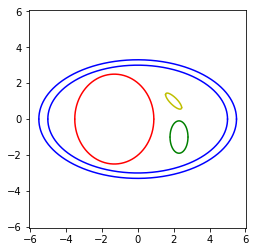

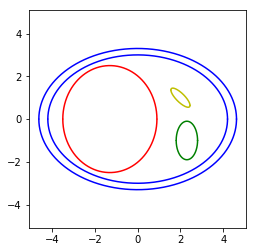

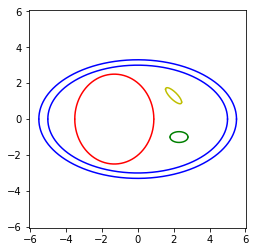

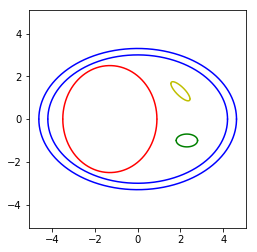

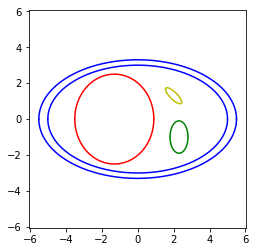

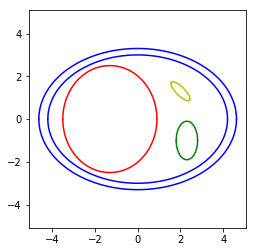

time: 44.794198 , arteries: 62


In [12]:
import time
t0 = time.time()
count = 0
for x_L in [-1,-1.3]:
    count+=1
    for alpha_lip in [np.pi/3,np.pi]:
        count+=1
        for y_cal in [1, 1.3]:
            count+=1
            for b_lip in [.3,.9]:
                count+=1
                for a_wall_in in [5,4.2]:
                    count+=1
                    artery_plot(a_wall_in, b_wall_in, thick_wall,x_L, a_L, b_L, x_cal, y_cal, a_cal, b_cal, alpha_cal,x_lip, y_lip, a_lip, b_lip, alpha_lip) 
print("time: %f , arteries try: %d"%(time.time()-t0,count))